In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2 as cv
import torch
import os
from tqdm import tqdm
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.8/882.8 kB 43.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Training on {device}')

model = YOLO('yolov8n.pt').to(device)

Training on cuda


100%|██████████| 6.25M/6.25M [00:00<00:00, 268MB/s]


In [ ]:
model.info(True)

layer                                     name  gradient   parameters                shape         mu      sigma
    0                      model.0.conv.weight     False          432        [16, 3, 3, 3]   -0.00279      0.152 torch.float32
    1                        model.0.bn.weight     False           16                 [16]       2.97       1.86 torch.float32
    2                          model.0.bn.bias     False           16                 [16]      0.249       4.17 torch.float32
    3                      model.1.conv.weight     False         4608       [32, 16, 3, 3]   -0.00012      0.063 torch.float32
    4                        model.1.bn.weight     False           32                 [32]       5.02       1.12 torch.float32
    5                          model.1.bn.bias     False           32                 [32]      0.942        1.5 torch.float32
    6                  model.2.cv1.conv.weight     False         1024       [32, 32, 1, 1]     -0.011     0.0906 torch.float3

(225, 3157200, 0, 8.8575488)

In [ ]:
for name, param in model.named_parameters():
        if 'model.22' not in name:  # Assuming the detect module is model.22
            param.requires_grad = False
        else:
            print(f"Training: {name}")

Training: model.model.22.cv2.0.0.conv.weight
Training: model.model.22.cv2.0.0.bn.weight
Training: model.model.22.cv2.0.0.bn.bias
Training: model.model.22.cv2.0.1.conv.weight
Training: model.model.22.cv2.0.1.bn.weight
Training: model.model.22.cv2.0.1.bn.bias
Training: model.model.22.cv2.0.2.weight
Training: model.model.22.cv2.0.2.bias
Training: model.model.22.cv2.1.0.conv.weight
Training: model.model.22.cv2.1.0.bn.weight
Training: model.model.22.cv2.1.0.bn.bias
Training: model.model.22.cv2.1.1.conv.weight
Training: model.model.22.cv2.1.1.bn.weight
Training: model.model.22.cv2.1.1.bn.bias
Training: model.model.22.cv2.1.2.weight
Training: model.model.22.cv2.1.2.bias
Training: model.model.22.cv2.2.0.conv.weight
Training: model.model.22.cv2.2.0.bn.weight
Training: model.model.22.cv2.2.0.bn.bias
Training: model.model.22.cv2.2.1.conv.weight
Training: model.model.22.cv2.2.1.bn.weight
Training: model.model.22.cv2.2.1.bn.bias
Training: model.model.22.cv2.2.2.weight
Training: model.model.22.cv2.2

In [ ]:
model.info(True)

layer                                     name  gradient   parameters                shape         mu      sigma
    0                      model.0.conv.weight     False          432        [16, 3, 3, 3]   -0.00279      0.152 torch.float32
    1                        model.0.bn.weight     False           16                 [16]       2.97       1.86 torch.float32
    2                          model.0.bn.bias     False           16                 [16]      0.249       4.17 torch.float32
    3                      model.1.conv.weight     False         4608       [32, 16, 3, 3]   -0.00012      0.063 torch.float32
    4                        model.1.bn.weight     False           32                 [32]       5.02       1.12 torch.float32
    5                          model.1.bn.bias     False           32                 [32]      0.942        1.5 torch.float32
    6                  model.2.cv1.conv.weight     False         1024       [32, 32, 1, 1]     -0.011     0.0906 torch.float3

(225, 3157200, 0, 8.8575488)

In [ ]:
results = model.train(data='/content/drive/MyDrive/YOLO_detection/weapon_data/data.yaml',
        epochs= 120,
        imgsz=640,
        batch=16,
        name='train_detect_module',
        freeze=[f'model.{i}' for i in range(22)],
        augment=True,
        visualize=True,
        single_cls = True)

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/YOLO_detection/weapon_data/data.yaml, epochs=120, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train_detect_module, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=['model.0', 'model.1', 'model.2', 'model.3', 'model.4', 'model.5', 'model.6', 'model.7', 'model.8', 'model.9', 'model.10', 'model.11', 'model.12', 'model.13', 'model.14', 'model.15', 'model.16', 'model.17', 'model.18', 'model.19', 'model.20', 'model.21'], multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visual

100%|██████████| 755k/755k [00:00<00:00, 107MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 287MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/YOLO_detection/weapon_data/labels/train.cache... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/YOLO_detection/weapon_data/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to runs/detect/train_detect_module/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train_detect_module
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      2.29G       1.99      4.873      1.453         25        640: 100%|██████████| 5/5 [00:46<00:00,  9.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all         10         10      0.002        0.6    0.00516     0.0019



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      2.27G      2.011      4.976      1.473         29        640: 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         10         10    0.00233        0.7    0.00655    0.00331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      2.27G      1.766      4.246      1.374         28        640: 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]


                   all         10         10    0.00233        0.7     0.0646      0.023

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      2.28G      1.783      4.048      1.352         24        640: 100%|██████████| 5/5 [00:01<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         10         10      0.003        0.9      0.166     0.0769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      2.28G       1.69      3.667       1.24         22        640: 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         10         10      0.003        0.9      0.177     0.0402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      2.28G      1.821      3.542      1.266         32        640: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         10         10      0.003        0.9      0.169     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      2.28G      1.826      3.118      1.229         33        640: 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         10         10    0.00267        0.8     0.0217     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      2.28G      1.654      2.834      1.155         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]


                   all         10         10    0.00267        0.8     0.0267    0.00875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      2.28G      1.744      2.908      1.218         25        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         10         10    0.00233        0.7      0.113     0.0564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      2.28G      1.717      2.712      1.325         32        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]

                   all         10         10    0.00233        0.7      0.138     0.0588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      2.27G      1.663      2.635      1.217         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]

                   all         10         10    0.00233        0.7     0.0349     0.0172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      2.28G      1.701      2.392      1.329         22        640: 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         10         10      0.003        0.9    0.00525    0.00164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      2.29G      1.573      2.416      1.223         36        640: 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         10         10    0.00233        0.7     0.0041    0.00129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      2.28G      1.727      2.343      1.218         34        640: 100%|██████████| 5/5 [00:01<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         10         10      0.002        0.6    0.00348    0.00147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      2.28G      1.771      2.316      1.341         29        640: 100%|██████████| 5/5 [00:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         10         10    0.00167        0.5    0.00485      0.002



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      2.28G      1.678      2.447      1.253         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         10         10    0.00133        0.4    0.00303     0.0013

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      2.29G      1.666       2.29      1.314         24        640: 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]

                   all         10         10      0.002        0.6    0.00507     0.0018



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      2.28G      1.741      2.292       1.28         26        640: 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all         10         10    0.00233        0.7     0.0159     0.0058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      2.28G      1.584      2.235      1.193         25        640: 100%|██████████| 5/5 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         10         10    0.00267        0.8     0.0996     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      2.28G      1.577      2.105      1.213         33        640: 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         10         10    0.00264        0.2     0.0982     0.0202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      2.28G      1.572      2.038      1.275         26        640: 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         10    0.00267        0.8     0.0513     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      2.28G      1.571      2.045      1.251         22        640: 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         10         10    0.00474        0.7     0.0988     0.0209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      2.28G      1.516      1.869      1.174         35        640: 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]


                   all         10         10    0.00663        0.1     0.0981     0.0109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      2.29G      1.459      1.922       1.23         25        640: 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         10         10      0.672      0.206      0.421      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      2.29G      1.449      1.873      1.132         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]

                   all         10         10      0.545        0.2      0.375      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      2.28G      1.544      1.841      1.179         29        640: 100%|██████████| 5/5 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         10         10       0.73        0.3      0.434       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      2.28G      1.532      1.793      1.176         25        640: 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         10         10      0.597        0.4      0.515      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      2.28G      1.475      1.754      1.167         21        640: 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         10         10      0.449      0.328      0.465      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      2.28G      1.458      1.689      1.214         24        640: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         10         10      0.656      0.385      0.501       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      2.28G      1.459      1.682       1.12         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


                   all         10         10      0.699      0.467      0.459      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      2.28G      1.363      1.597      1.088         23        640: 100%|██████████| 5/5 [00:01<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         10         10      0.678      0.424       0.44      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      2.28G      1.411      1.716      1.121         30        640: 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]


                   all         10         10      0.585      0.567      0.508      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      2.28G      1.429      1.544       1.12         28        640: 100%|██████████| 5/5 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all         10         10      0.711        0.5      0.523      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      2.28G       1.34      1.488      1.115         28        640: 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         10         10          1      0.465      0.537      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      2.29G      1.323      1.519      1.084         28        640: 100%|██████████| 5/5 [00:01<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         10         10          1      0.399      0.488      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      2.29G      1.368      1.432       1.09         33        640: 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         10         10       0.78        0.4      0.493       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      2.31G      1.365      1.427      1.148         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


                   all         10         10          1      0.287      0.421      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      2.29G      1.388        1.4       1.13         27        640: 100%|██████████| 5/5 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]

                   all         10         10      0.753        0.4      0.482      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      2.29G      1.339      1.439      1.151         30        640: 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]


                   all         10         10      0.811        0.5      0.558      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      2.29G      1.348      1.468      1.141         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.26it/s]

                   all         10         10      0.673        0.5      0.553      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      2.29G      1.268      1.293      1.052         28        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]

                   all         10         10          1      0.389      0.512      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      2.29G      1.202      1.254      1.074         30        640: 100%|██████████| 5/5 [00:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         10         10      0.572      0.538      0.562      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      2.29G      1.243       1.25      1.109         30        640: 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         10         10      0.622      0.661      0.681      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      2.29G      1.215       1.25      1.059         32        640: 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         10         10      0.442        0.8      0.514      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      2.29G      1.281      1.327      1.079         31        640: 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.98it/s]

                   all         10         10      0.398        0.8      0.489      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      2.29G      1.211      1.261      1.052         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all         10         10      0.788        0.4      0.597      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      2.29G      1.257      1.217      1.096         26        640: 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]


                   all         10         10      0.954        0.4      0.587      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      2.29G       1.28      1.258       1.08         38        640: 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all         10         10      0.983        0.5      0.658      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120      2.29G      1.268       1.21      1.078         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         10         10      0.944        0.6      0.693      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      2.29G      1.251      1.219      1.065         34        640: 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         10         10      0.756        0.5      0.632      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      2.29G      1.276      1.233      1.093         30        640: 100%|██████████| 5/5 [00:01<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         10         10       0.81        0.5      0.586      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      2.29G      1.238      1.153      1.055         28        640: 100%|██████████| 5/5 [00:01<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]


                   all         10         10      0.782        0.4      0.496      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      2.29G      1.197      1.147       1.03         36        640: 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]

                   all         10         10      0.774        0.4      0.474      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      2.29G      1.192      1.126      1.016         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

                   all         10         10      0.979        0.5      0.693      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      2.29G      1.206      1.162      1.039         35        640: 100%|██████████| 5/5 [00:01<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


                   all         10         10      0.862      0.627      0.758      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      2.29G      1.083      1.021      1.009         28        640: 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         10         10      0.887      0.789      0.784      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      2.29G      1.053      0.991     0.9999         25        640: 100%|██████████| 5/5 [00:01<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         10         10      0.885       0.77      0.812      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      2.29G      1.084      1.059      1.014         24        640: 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         10         10      0.978        0.6      0.772      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      2.29G      1.147      1.106      1.019         27        640: 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         10         10      0.966        0.6      0.735      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      2.29G      1.125      1.021      1.034         26        640: 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]

                   all         10         10      0.974        0.5      0.695      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      2.29G      1.122      1.026      1.021         24        640: 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]


                   all         10         10          1      0.493      0.692      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      2.29G      1.149      1.023      1.036         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         10         10      0.749      0.597      0.686      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120      2.31G      1.065      1.024      1.004         27        640: 100%|██████████| 5/5 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.90it/s]

                   all         10         10      0.864        0.7      0.731      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      2.29G      1.093      1.007      1.003         32        640: 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]

                   all         10         10          1      0.696      0.782       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      2.29G     0.9904     0.9145     0.9779         24        640: 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         10         10      0.871       0.68      0.756      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      2.29G     0.9927     0.9349     0.9907         36        640: 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         10         10      0.769        0.8      0.808      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      2.29G       1.02     0.8989      0.978         34        640: 100%|██████████| 5/5 [00:01<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         10         10       0.72      0.774      0.806      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      2.29G     0.9737     0.9521      1.018         27        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]


                   all         10         10      0.666      0.598      0.605      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      2.29G     0.9417     0.8737     0.9509         40        640: 100%|██████████| 5/5 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]

                   all         10         10      0.662      0.588       0.58       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      2.29G      1.004     0.9099     0.9669         26        640: 100%|██████████| 5/5 [00:01<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]


                   all         10         10      0.774      0.688      0.791      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      2.29G      1.023     0.9007      1.001         33        640: 100%|██████████| 5/5 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         10         10      0.944        0.6      0.793      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      2.29G     0.9085     0.8551     0.9484         22        640: 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]

                   all         10         10      0.979        0.6      0.763      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      2.29G     0.9839      0.883     0.9715         33        640: 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         10         10      0.976        0.6      0.763      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      2.29G       1.01     0.8852     0.9819         31        640: 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         10         10      0.719      0.769      0.772      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      2.29G     0.9494     0.8225     0.9719         29        640: 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all         10         10      0.873      0.689      0.764        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      2.29G     0.9573     0.8494     0.9762         26        640: 100%|██████████| 5/5 [00:01<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]


                   all         10         10          1      0.592      0.752      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      2.29G          1     0.8615     0.9616         33        640: 100%|██████████| 5/5 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         10         10      0.977        0.6      0.748      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      2.29G     0.9085      0.821     0.9342         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.86it/s]

                   all         10         10      0.976        0.6      0.751      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      2.29G     0.8952     0.8188     0.9418         31        640: 100%|██████████| 5/5 [00:01<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         10         10      0.974        0.6      0.744      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      2.29G     0.8361     0.8318     0.9083         28        640: 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         10         10          1      0.592      0.752      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120      2.29G     0.8608     0.7863     0.9057         26        640: 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         10         10      0.828        0.6      0.708      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      2.31G     0.8911     0.7779     0.9562         41        640: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         10         10      0.913        0.5      0.696       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      2.29G     0.8222     0.7782     0.8873         24        640: 100%|██████████| 5/5 [00:00<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all         10         10      0.558        0.8      0.713      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      2.29G     0.9193     0.8308     0.9202         23        640: 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         10         10      0.854      0.589      0.706       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      2.29G     0.9007     0.8147     0.9551         30        640: 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         10         10          1      0.578      0.752      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      2.29G     0.9305     0.7876     0.9291         23        640: 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

                   all         10         10          1      0.599      0.737      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      2.29G     0.9507     0.8022     0.9264         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]


                   all         10         10          1      0.591      0.736      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      2.29G      0.832     0.7408     0.9141         32        640: 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         10         10      0.979        0.5      0.684      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      2.29G     0.8331     0.7732     0.9328         29        640: 100%|██████████| 5/5 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         10         10       0.98        0.5      0.683      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      2.29G     0.9608     0.8111     0.9421         34        640: 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         10         10      0.977        0.5      0.671      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      2.29G     0.8356     0.7443      0.911         30        640: 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all         10         10      0.852      0.578       0.68      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      2.29G     0.8723     0.7482     0.9139         38        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

                   all         10         10      0.855      0.591      0.676      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      2.29G     0.8729     0.7883     0.9318         25        640: 100%|██████████| 5/5 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         10         10       0.85        0.6       0.67      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      2.29G     0.8092     0.7584      0.927         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]


                   all         10         10      0.842        0.6      0.656      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      2.29G     0.8579     0.7682     0.9369         23        640: 100%|██████████| 5/5 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         10         10      0.843        0.6      0.674      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      2.29G      0.881     0.7753     0.9342         31        640: 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         10         10      0.872      0.685      0.713      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      2.29G     0.8134      0.716     0.9165         31        640: 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         10         10      0.854        0.6      0.694      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120      2.29G     0.8094     0.7624     0.8984         30        640: 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all         10         10      0.839        0.6      0.694      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      2.29G     0.8106     0.7257     0.9169         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         10         10      0.834        0.6       0.69      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      2.29G     0.7945     0.7135     0.8977         32        640: 100%|██████████| 5/5 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         10         10       0.84        0.6      0.697      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      2.29G      0.794      0.694     0.9078         24        640: 100%|██████████| 5/5 [00:01<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         10         10      0.843        0.6      0.699      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      2.29G     0.7556     0.7225     0.9013         25        640: 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         10         10      0.843        0.6        0.7      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      2.29G     0.8187     0.7223     0.9055         27        640: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         10         10      0.834        0.6       0.69      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      2.29G     0.8025     0.7185     0.8911         27        640: 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         10         10       0.83        0.6      0.692      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      2.31G      0.751      0.698     0.8942         29        640: 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all         10         10      0.828        0.6       0.69      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      2.29G     0.7459     0.6679     0.9129         25        640: 100%|██████████| 5/5 [00:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]

                   all         10         10      0.828        0.6      0.703       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      2.29G     0.8049     0.7209     0.9041         23        640: 100%|██████████| 5/5 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         10         10      0.774      0.688      0.745      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      2.29G     0.7477     0.6755     0.8977         39        640: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]

                   all         10         10      0.765        0.7      0.742      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      2.29G      0.734     0.6533     0.8872         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         10         10      0.753        0.7       0.73      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      2.29G     0.7362     0.6578     0.9167         26        640: 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         10         10      0.731        0.7       0.74      0.402


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      2.29G      0.725     0.7301     0.8481         16        640: 100%|██████████| 5/5 [00:06<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]


                   all         10         10      0.715        0.7      0.739      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120      2.29G     0.6966     0.6949     0.8477         14        640: 100%|██████████| 5/5 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all         10         10      0.767      0.662      0.747      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120      2.29G     0.7123      0.703     0.8724         14        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]


                   all         10         10      0.649        0.8      0.743      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120       2.3G     0.6604     0.6628     0.8457         15        640: 100%|██████████| 5/5 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all         10         10      0.757        0.7      0.755      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      2.29G     0.6251     0.6632     0.8594         14        640: 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         10         10      0.758        0.7      0.753      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      2.29G     0.6414     0.6626     0.8354         14        640: 100%|██████████| 5/5 [00:01<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         10         10      0.793       0.77      0.736      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120      2.29G     0.6854     0.6849      0.865         16        640: 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         10         10      0.795      0.778      0.736      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      2.29G     0.6747     0.6797     0.8497         14        640: 100%|██████████| 5/5 [00:01<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         10         10      0.796      0.784      0.736       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      2.29G     0.6337     0.6577     0.8557         15        640: 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         10         10        0.8      0.798      0.754      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120      2.29G     0.7027     0.6849     0.8783         16        640: 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         10         10      0.788        0.8      0.753      0.403

120 epochs completed in 0.096 hours.
Optimizer stripped from runs/detect/train_detect_module/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train_detect_module/weights/best.pt, 5.6MB

Validating runs/detect/train_detect_module/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


                   all         10         10      0.724        0.8       0.82      0.481
Speed: 0.2ms preprocess, 23.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train_detect_module


In [ ]:
print("Precision\t  Recall\tmAP50\t\tmAP95")
results.class_result(0)

Precision	  Recall	mAP50		mAP95


(0.7236952553408249, 0.8, 0.8195487323516017, 0.4808126135175586)

In [ ]:
predictions = model.predict(source="/content/drive/MyDrive/YOLO_detection/weapon_data/images/test", conf = 0.58)


image 1/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im16.jpg: 640x640 (no detections), 130.2ms
image 2/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im2.jpg: 640x640 1 Guns, 35.3ms
image 3/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im31.jpg: 640x640 1 Guns, 25.3ms
image 4/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im33.jpg: 640x640 2 Gunss, 25.2ms
image 5/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im45.jpg: 640x640 1 Guns, 25.6ms
image 6/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im61.jpg: 640x640 1 Guns, 26.0ms
image 7/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im62.jpg: 640x640 1 Guns, 25.2ms
image 8/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im64.jpg: 640x640 1 Guns, 25.5ms
image 9/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im66.jpg: 640x640 (no detections), 25.3ms
image 10/10 /content/drive

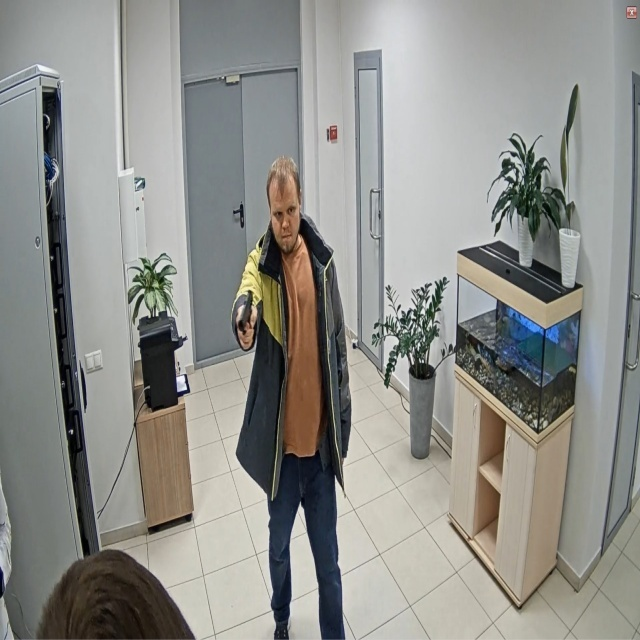

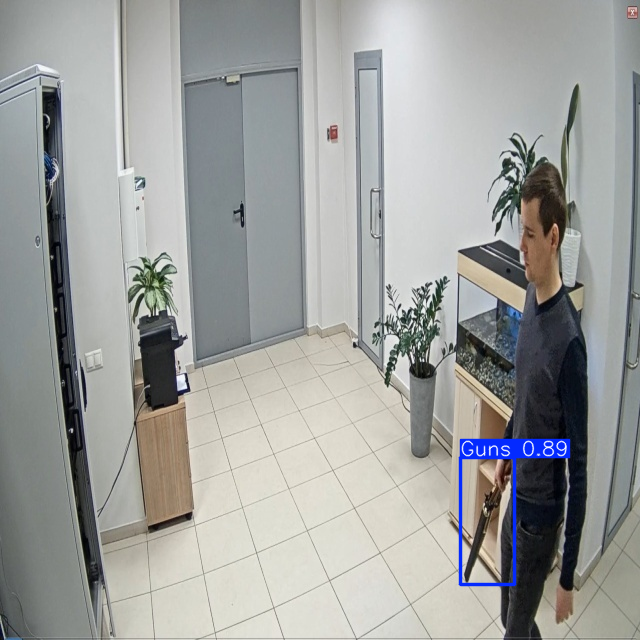

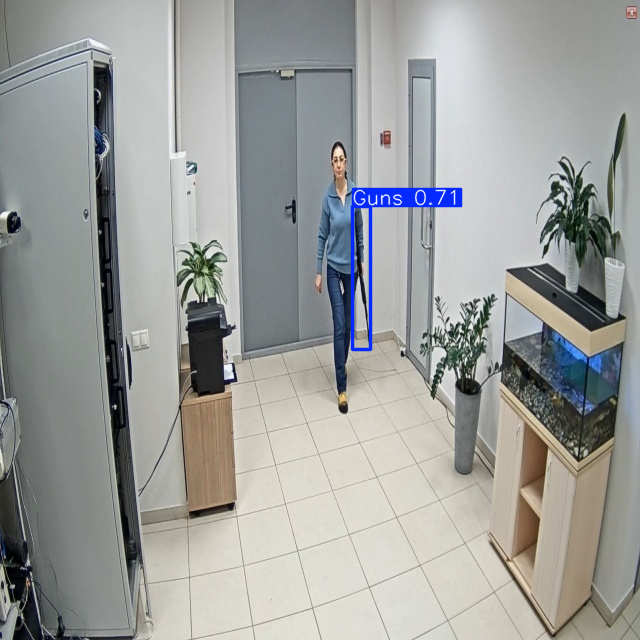

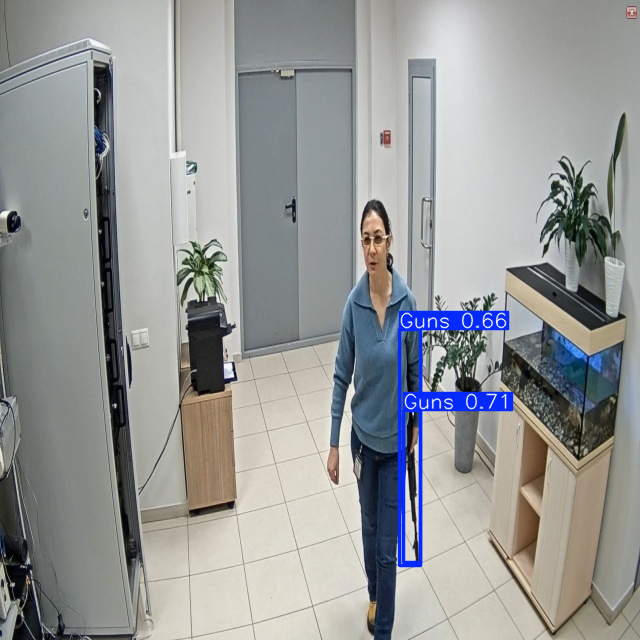

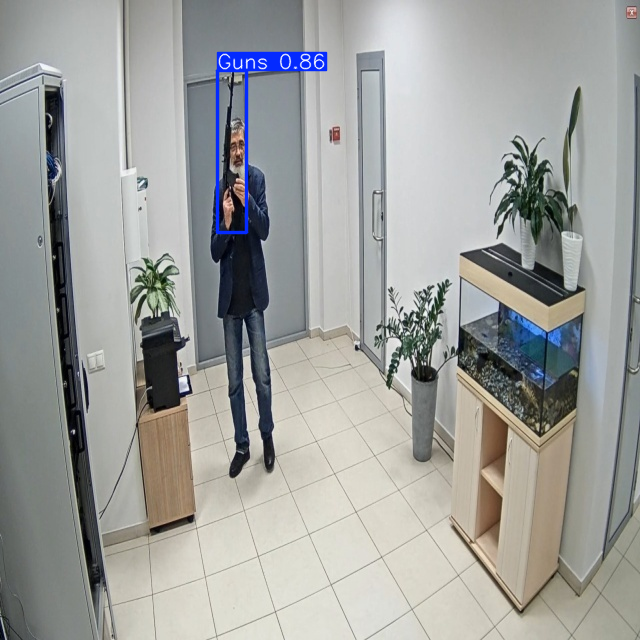

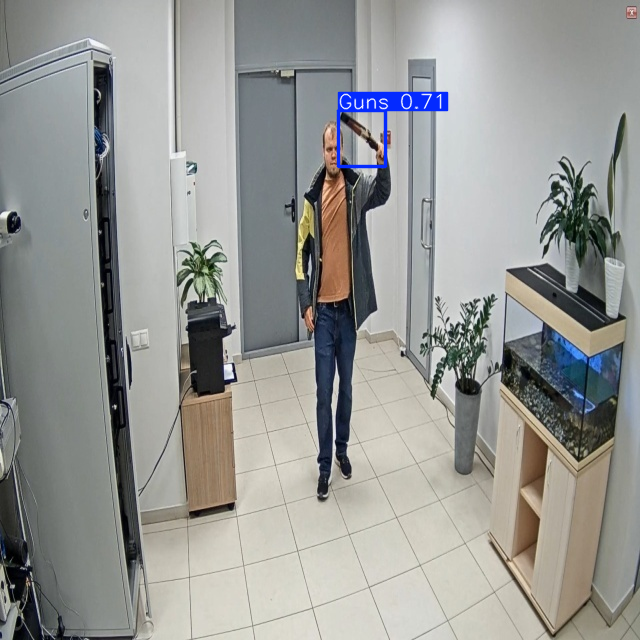

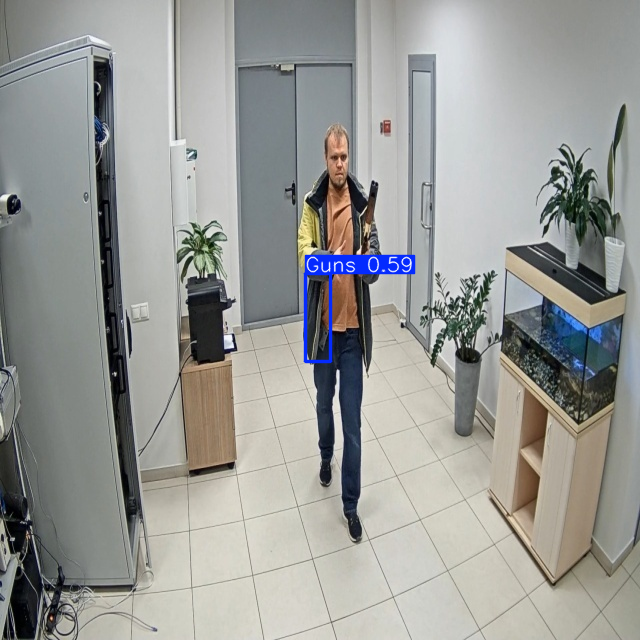

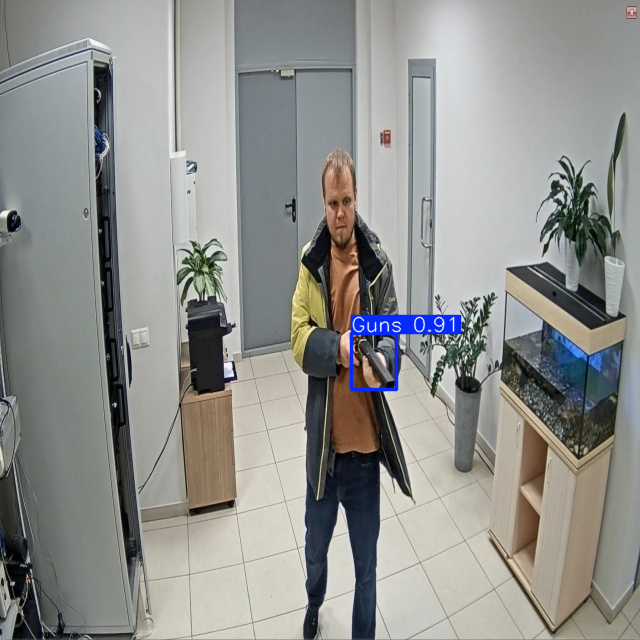

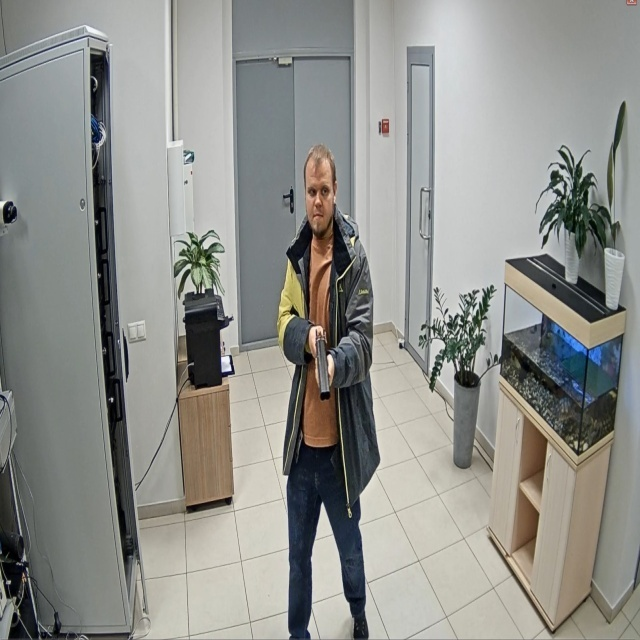

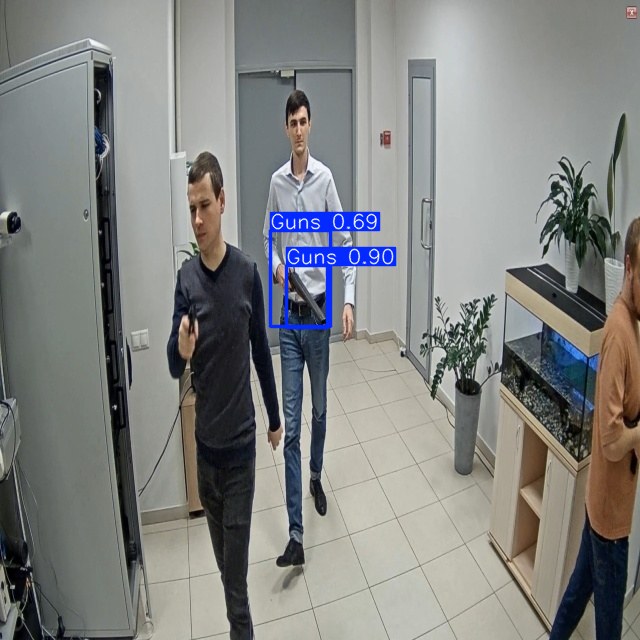

In [26]:
for result in predictions:
    result.show()